In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups_vectorized
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def load_spambase():
    path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 3B/spambase/spambase.data"
    data = np.loadtxt(path, delimiter=",")
    
    # separate the features and labels
    X = data[:, :-1]
    y = data[:, -1]
    
    # normalize the features
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
    
    return X_train, y_train, X_test, y_test

In [3]:
def load_20ng():
    X_train, y_train = fetch_20newsgroups_vectorized(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    X_test, y_test = fetch_20newsgroups_vectorized(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    
    return X_train, y_train, X_test, y_test

In [4]:
def load_mnist():
    num_classes = 10
    input_shape = (28, 28, 1)
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Scale images to the [0, 1] range
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
    
    
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    return X_train, y_train, X_test, y_test

In [5]:
def load_fashion():
    num_classes = 10
    input_shape = (28, 28, 1)
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    # Scale images to the [0, 1] range
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)
    
    #y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    #y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    
    return X_train, y_train, X_test, y_test

# Problem 1
## tSNE dim reduction

Run tSNE library/package on MNIST and 20NG datasets, to obtain a representation is 2-dim or 3-dim, and visualize the data by plotting datapoints with a color per label. Try different values for perplexity like 5, 20 and 100.

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [7]:
X_train, y_train, X_test, y_test = load_mnist()

In [8]:
feat_cols = [ 'pixel'+str(i) for i in range(X_train.shape[1]) ]

df = pd.DataFrame(X_train, columns = feat_cols)
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))

In [9]:
X_embedded = TSNE(n_components = 2, perplexity = 5, verbose = 1).fit_transform(X_train)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.040s...
[t-SNE] Computed neighbors for 60000 samples in 20.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

In [10]:
X_embedded.shape

(60000, 2)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

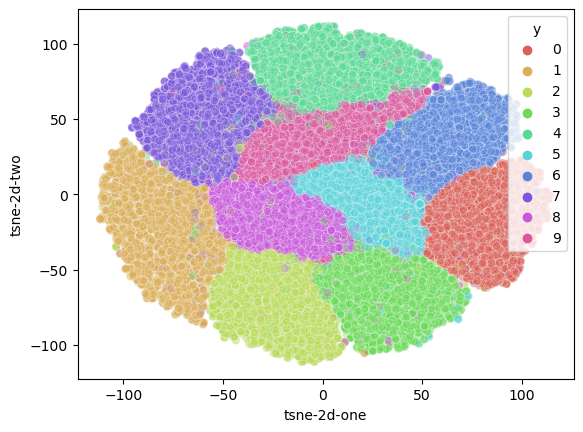

In [11]:
df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.039s...
[t-SNE] Computed neighbors for 60000 samples in 22.556s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

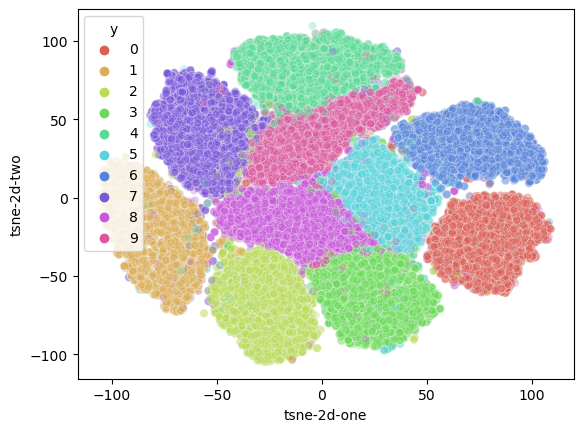

In [12]:
X_embedded = TSNE(n_components = 2, perplexity = 20, verbose = 1).fit_transform(X_train)

df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.039s...
[t-SNE] Computed neighbors for 60000 samples in 23.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

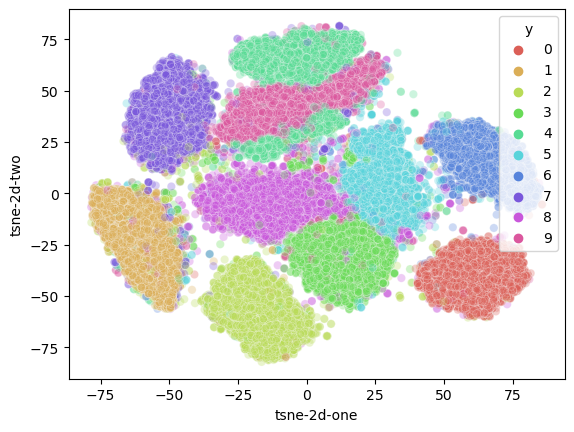

In [13]:
X_embedded = TSNE(n_components = 2, perplexity = 100, verbose = 1).fit_transform(X_train)

df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [14]:
X_train, y_train, X_test, y_test = load_20ng()





In [15]:
svd = TruncatedSVD(n_components = 200)
X_train_svd = svd.fit_transform(X_train)


feat_cols = [str(i) for i in range(X_train_svd.shape[1]) ]

df = pd.DataFrame(X_train_svd, columns = feat_cols)
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))


In [16]:
X_embedded = TSNE(n_components = 2, perplexity = 5).fit_transform(X_train_svd)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

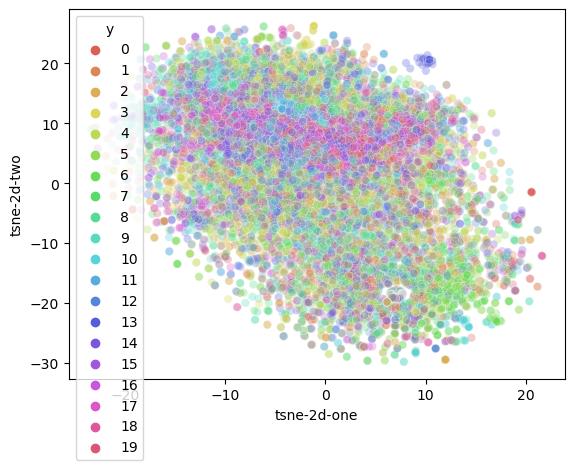

In [42]:


df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 20),
    data=df,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

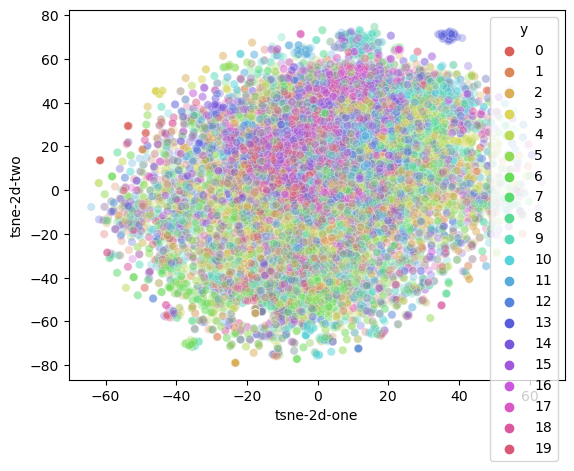

In [40]:
X_train, y_train, X_test, y_test = load_20ng()

svd = TruncatedSVD(n_components = 200)
X_train_svd = svd.fit_transform(X_train)


feat_cols = [str(i) for i in range(X_train_svd.shape[1]) ]

df = pd.DataFrame(X_train_svd, columns = feat_cols)
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))

X_embedded = TSNE(n_components = 2, perplexity = 20).fit_transform(X_train_svd)


df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 20),
    data=df,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

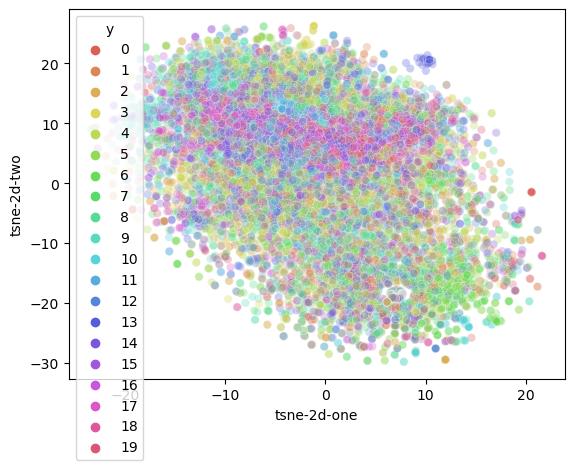

In [41]:
X_train, y_train, X_test, y_test = load_20ng()

svd = TruncatedSVD(n_components = 200)
X_train_svd = svd.fit_transform(X_train)


feat_cols = [str(i) for i in range(X_train_svd.shape[1]) ]

df = pd.DataFrame(X_train_svd, columns = feat_cols)
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))

X_embedded = TSNE(n_components = 2, perplexity = 100).fit_transform(X_train_svd)


df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]

fig, ax = plt.subplots()
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue="y",
    palette=sns.color_palette("hls", 20),
    data=df,
    legend="full",
    alpha=0.3
)

# Problem 2
## Pairwise Feature selection for text

On 20NG, run featurre selection using skikit-learn built in "chi2" criteria to select top 200 features. Rerun a classification task, compare performance with HW3A-PB1. Then repeat the whole pipeline with "mutual-information" criteria.

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
X_train, y_train, X_test, y_test = load_20ng()

X_embedded = SelectKBest(chi2, k = 200).fit_transform(X_train, y_train)

In [22]:
X_embedded

<11314x200 sparse matrix of type '<class 'numpy.float64'>'
	with 76369 stored elements in Compressed Sparse Row format>

In [23]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 1000)
X_train, y_train, X_test, y_test = load_20ng()

ng_chi2 = model.fit(X_train, y_train)

y_pred = ng_chi2.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       319
           1       0.56      0.62      0.59       389
           2       0.61      0.53      0.57       394
           3       0.61      0.53      0.56       392
           4       0.61      0.55      0.58       385
           5       0.65      0.58      0.62       395
           6       0.63      0.78      0.69       390
           7       0.62      0.57      0.59       396
           8       0.56      0.59      0.57       398
           9       0.41      0.66      0.50       397
          10       0.75      0.78      0.77       399
          11       0.67      0.57      0.62       396
          12       0.46      0.44      0.45       393
          13       0.51      0.57      0.54       396
          14       0.62      0.62      0.62       394
          15       0.53      0.72      0.61       398
          16       0.47      0.55      0.51       364
    

This accuracy score of .56 is identical to the accuracy score achieved in Hw 3A Problem 1, this is due to the 200 features we selected containaing most of the information in the data.

In [ ]:
X_train, y_train, X_test, y_test = load_20ng()

X_embedded = SelectKBest(mutual_info_classif, k = 200).fit_transform(X_train, y_train)
print("done")
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 1000)
X_train, y_train, X_test, y_test = load_20ng()

ng_mutual_info = model.fit(X_train, y_train)

y_pred = ng_mutual_info.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Again we see an accuracy score of .56, matching the score from Hw 3A Problem 1

# PROBLEM 3 
## L1 feature selection on text

Run a strongL1-regularized regression (library) on 20NG, and select 200 features (words) based on regression coefficients absolute value. Then reconstruct the dateaset with only these features, and rerun any of the classification tasks,

In [25]:
X_train, y_train, X_test, y_test = load_20ng()

X_embedded = SelectKBest(f_regression, k = 200).fit_transform(X_train, y_train)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 1000)
X_train, y_train, X_test, y_test = load_20ng()

ng_regression = model.fit(X_train, y_train)

y_pred = ng_regression.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       319
           1       0.56      0.62      0.59       389
           2       0.61      0.53      0.57       394
           3       0.61      0.53      0.56       392
           4       0.61      0.55      0.58       385
           5       0.65      0.58      0.62       395
           6       0.63      0.78      0.69       390
           7       0.62      0.57      0.59       396
           8       0.56      0.59      0.57       398
           9       0.41      0.66      0.50       397
          10       0.75      0.78      0.77       399
          11       0.67      0.57      0.62       396
          12       0.46      0.44      0.45       393
          13       0.51      0.57      0.54       396
          14       0.62      0.62      0.62       394
          15       0.53      0.72      0.61       398
          16       0.47      0.55      0.51       364
    

# PROBLEM 4 
## HARR features for MNIST

Implement and run HAAR feature Extraction for each image on the Digit Dataset. Then repeat the classification task with the extracted features.

In [26]:
import math
import random as rand

In [50]:
X_train, y_train, X_test, y_test = load_mnist()
X_train = np.where(X_train >= .5, 1, 0)
X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0], 28,28)

In [28]:
def black_array(x):
    # takes in a 2d array of pixels with 0/1 for white/black, and counts the number of black images in a square from top left to i,j
    # returns array of black counts
    rows, cols = x.shape
    arr = np.zeros((rows, cols))
    arr[0] = 0
    arr[:,0] = 0
    for i in range(1, rows):
        for j in range(1, cols):
            arr[i,j] = arr[i, j-1] + arr[i-1, j] - arr[i-1, j-1] + x[i,j]
    return arr

In [29]:
def rect(rows = 28, cols = 28, area = 150):
    # creates dimensions of a rectangle with area, within the dimensions of rows/cols
    l_min = round(area/rows)
    l_max = rows-1
    
    #determine length and width of rectangle
    l = rand.randint(l_min, l_max)
    w = min(round(area/l), cols-1)
    
    #determine coordinates of ABCD
    if cols-w-1 > 0:
        a_x = rand.randint(0, cols-w-1)
    else:
        a_x = 0
    if rows-l-1 > 0:
        a_y = rand.randint(0, rows-l-1)
    else:
        a_y = 0
        
    a = (a_x, a_y)
    b = (a_x + w, a_y)
    c = (a_x, + a_y + l)
    d = (a_x + w, a_y + l)
    
    return (a, b, c, d)

In [30]:
def rect_arr(n_iters = 100):
    # returns array of rectangles created by rect() function
    arr = []
    for i in range(n_iters):
        arr.append(rect())
    return arr

In [31]:
def black(rect, arr):
    #returns count of black pixels within a given rectangle
    a, b, c, d = rect
    
    return arr[d] -arr[b] - arr[c]+ arr[a]

In [32]:
def get_features(rect, arr):
    a, b, c, d = rect
    q = (a[0], round((a[1]+c[1])/2))
    r = (b[0], round((b[1]+d[1])/2))
    m = (round((a[0]+b[0])/2), a[1])
    n = (round((c[0]+d[0])/2), c[1])
    
    vert = black((a,b,q,r), arr) - black((q,r,c,d),arr)
    horiz = black((a,m,c,n),arr) - black((m,b,n,d),arr)
    
    return (vert,horiz)

In [33]:
def HAAR(X, rectangles = 100):
    rects = rect_arr()
    arr = np.empty((X.shape[0], rectangles*2))
    print(arr.shape)
    for i in range(len(X)):
        idx = 0
        black_arr = black_array(X[i])
        for j in range(0, len(rects)):
            h, v = get_features(rects[j], black_arr)
            arr[i][idx] = h
            arr[i][idx+1] = v
            idx += 2
    return arr
        

In [51]:
arr = HAAR(X_train)

(60000, 200)


In [60]:
model = LogisticRegression(random_state = 123, max_iter = 300)

mnist_HAAR = model.fit(arr, y_train)

C:\Users\chase\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
y_pred = mnist_HAAR.predict(arr)
print("Classification Report ")
print(classification_report(y_train, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_train, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5923
           1       0.95      0.97      0.96      6742
           2       0.92      0.90      0.91      5958
           3       0.90      0.89      0.90      6131
           4       0.92      0.93      0.92      5842
           5       0.89      0.86      0.87      5421
           6       0.94      0.96      0.95      5918
           7       0.94      0.93      0.93      6265
           8       0.88      0.88      0.88      5851
           9       0.89      0.90      0.90      5949

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000

Confusion Matrix: 
[[5730    1   23   12   18   43   35   10   43    8]
 [   1 6561   31   22    8   16    5   12   77    9]
 [  43   68 5337   93   70   25   83   68  156   15]
 [  21   23  146 5475   10  211   17   5